<a href="https://colab.research.google.com/github/AndSiq97/Heart-Failure-Data-Challenge/blob/main/Heart_Failure_Dataset_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import os
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [2]:
# Uncomment this cell, Run this, comment cell, restart runtime and run everything else
# !pip install --upgrade matplotlib

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle


# **Attribute Information**
### **Features**
1.   **Age**: age of the patient [years]
2.   **Sex**: sex of the patien [M: Male, F: Female]
3.   **ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.   **RestingBP**: resting blood pressure [mm Hg]
5.   **Cholesterol**: serum cholesterol [mm/dl]
6.   **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.   **RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.   **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202 BPM]
9.   **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No]
10.  **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
11.  **ST_Slope**: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

### **Target**
*   **HeartDisease**: output class [1: heart disease (HD), 0: Normal (Normal)]

Load Data

In [5]:
# Reading in Heart csv file
heart_data = pd.read_csv("/content/gdrive/MyDrive/heart.csv")

In [6]:
# Data Manipulation and Cleaning
heart_data.HeartDisease = heart_data.HeartDisease.replace({1: "HD", 0: "Norm"})
heart_data.FastingBS = heart_data.FastingBS.replace({1: ">120 mg/dl", 0: "=<120 mg/dl"})
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,=<120 mg/dl,Normal,172,N,0.0,Up,Norm
1,49,F,NAP,160,180,=<120 mg/dl,Normal,156,N,1.0,Flat,HD
2,37,M,ATA,130,283,=<120 mg/dl,ST,98,N,0.0,Up,Norm
3,48,F,ASY,138,214,=<120 mg/dl,Normal,108,Y,1.5,Flat,HD
4,54,M,NAP,150,195,=<120 mg/dl,Normal,122,N,0.0,Up,Norm


Data Analysis and Inference

In [7]:
# Shape of Heart Dataframe
heart_data.shape

(918, 12)

In [8]:
# More Data Manipulation and Cleaning (Made a Copy of Heart Dataframe and Changed Data a Little for Machine Learning Purposes)
heart_data_copy = heart_data.copy()
heart_data_copy.Sex = heart_data_copy.Sex.replace({"M": '1', "F": '0'})
heart_data_copy.HeartDisease = heart_data_copy.HeartDisease.replace({"HD": '1', "Norm": '0'})
heart_data_copy.RestingECG = heart_data_copy.RestingECG.replace({"LVH": '2', "ST": '1', "Normal": '0'})
heart_data_copy.ExerciseAngina = heart_data_copy.ExerciseAngina.replace({"Y": '1', "N": '0'})
heart_data_copy.FastingBS = heart_data_copy.FastingBS.replace({">120 mg/dl": '1', "=<120 mg/dl": '0'})
heart_data_copy.ST_Slope = heart_data_copy.ST_Slope.replace({"Up": '2', "Flat": '1', "Down": '0'})
heart_data_copy.ChestPainType = heart_data_copy.ChestPainType.replace({"TA": '3', "ATA": '2', "NAP": '1', "ASY": '0'})
heart_data_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,2,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,2,130,283,0,1,98,0,0.0,2,0
3,48,0,0,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,2,0


In [9]:
# Check number of NULL values in DataFrame
heart_data.isnull().sum().sum()

0

In [10]:
# Describe the Heart Dataset
heart_data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [11]:
# Data Columns
heart_data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

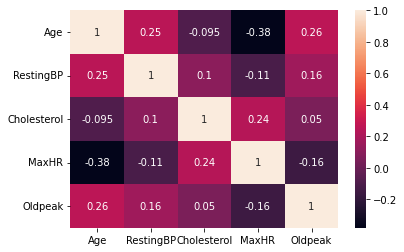

In [12]:
# Correlation Matrix (Meaningful Mostly for Continuous Variables)
corrMatrix = heart_data.corr()
corrMatrix
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
# Correlation Between Heart Disease and the Different Factors/Features
from scipy import stats

corr_list = []
y = heart_data_copy['HeartDisease'].astype(int)
columns=['Age','Sex','ChestPainType','RestingBP','Cholesterol',
                           'FastingBS','RestingECG','MaxHR','ExerciseAngina',
                           'Oldpeak','ST_Slope','HeartDisease']

for column in heart_data_copy:
    x=heart_data_copy[column].astype(int)
    corr = stats.pointbiserialr(list(x), list(y))
    corr_list.append(corr[0])

df=pd.DataFrame(corr_list,columns)
df.columns = ['HeartDisease']
df

,HeartDisease
Age,0.282039
Sex,0.305445
ChestPainType,-0.471354
RestingBP,0.107589
Cholesterol,-0.232741
FastingBS,0.267291
RestingECG,0.061011
MaxHR,-0.400421
ExerciseAngina,0.494282
Oldpeak,0.392385


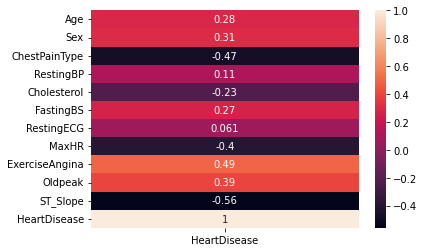

In [14]:
# Correlation Between Heart Disease and the Different Factors/Features as Heatmap Visualization
sns.heatmap(df, annot=True)
plt.show()

Age and Gender for Some Health/Demograhic Factor

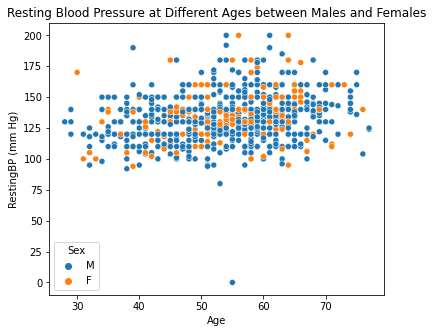

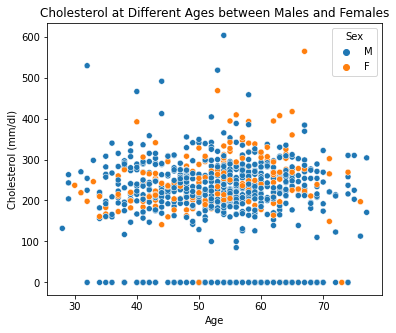

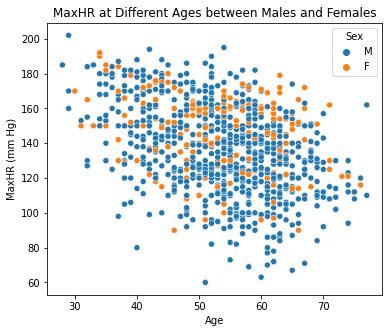

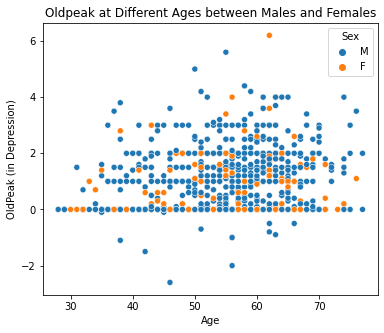

In [15]:
fig_dims = (6, 5)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'Age', y = 'RestingBP', ax = ax, 
            hue = "Sex",
            data = heart_data)
plt.ylabel('RestingBP (mm Hg)')
plt.title("Resting Blood Pressure at Different Ages between Males and Females") 
plt.show()

fig_dims = (6, 5)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'Age', y = 'Cholesterol', ax = ax, 
            hue = "Sex",
            data = heart_data)
plt.ylabel('Cholesterol (mm/dl)')
plt.title("Cholesterol at Different Ages between Males and Females") 
plt.show()

fig_dims = (6, 5)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'Age', y = 'MaxHR', ax = ax, 
            hue = "Sex",
            data = heart_data)
plt.ylabel('MaxHR (mm Hg)')
plt.title("MaxHR at Different Ages between Males and Females") 
plt.show()

fig_dims = (6, 5)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'Age', y = 'Oldpeak', ax = ax, 
            hue = "Sex",
            data = heart_data)
plt.ylabel('OldPeak (in Depression)')
plt.title("Oldpeak at Different Ages between Males and Females") 
plt.show()

Age and Heart Disease Condition for Some Health/Demograhic Factor

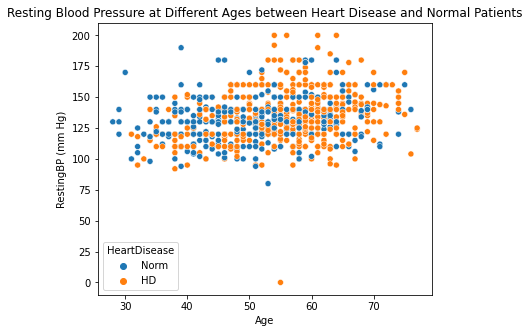

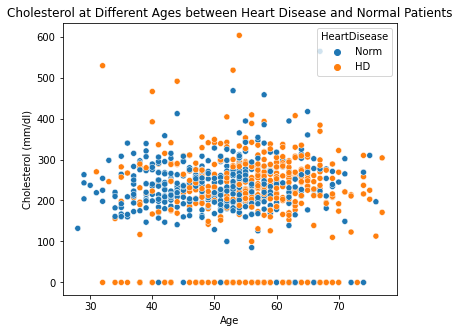

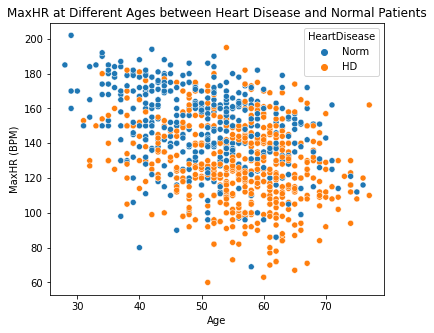

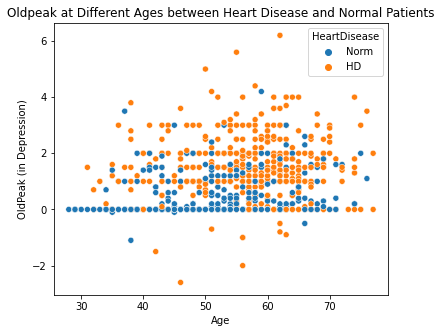

In [16]:
fig_dims = (6, 5)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'Age', y = 'RestingBP', ax = ax, 
            hue = "HeartDisease",
            data = heart_data)
plt.ylabel('RestingBP (mm Hg)')
plt.title("Resting Blood Pressure at Different Ages between Heart Disease and Normal Patients") 
plt.show()

fig_dims = (6, 5)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'Age', y = 'Cholesterol', ax = ax, 
            hue = "HeartDisease",
            data = heart_data)
plt.ylabel('Cholesterol (mm/dl)')
plt.title("Cholesterol at Different Ages between Heart Disease and Normal Patients") 
plt.show()

fig_dims = (6, 5)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'Age', y = 'MaxHR', ax = ax, 
            hue = "HeartDisease",
            data = heart_data)
plt.ylabel('MaxHR (BPM)')
plt.title("MaxHR at Different Ages between Heart Disease and Normal Patients") 
plt.show()

fig_dims = (6, 5)
fig, ax = fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(x = 'Age', y = 'Oldpeak', ax = ax, 
            hue = "HeartDisease",
            data = heart_data)
plt.ylabel('OldPeak (in Depression)')
plt.title("Oldpeak at Different Ages between Heart Disease and Normal Patients") 
plt.show()

Average Age Between Males and Females

In [17]:
group = heart_data.groupby("Sex")["Age"].mean()
group

Sex
F    52.492228
M    53.782069
Name: Age, dtype: float64

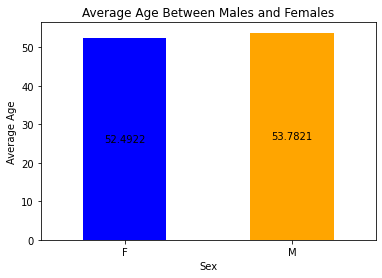

In [18]:
plt.title("Average Age Between Males and Females")
plt.ylabel("Average Age")

ax = group.plot(kind='bar', color=['b','orange'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Age With/Without Heart Disease

In [19]:
group = heart_data.groupby("HeartDisease")["Age"].mean()
group

HeartDisease
HD      55.899606
Norm    50.551220
Name: Age, dtype: float64

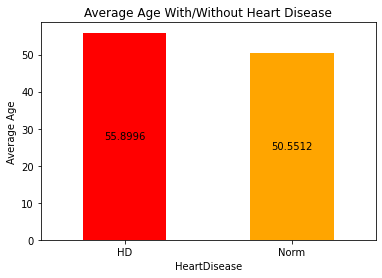

In [20]:
plt.title("Average Age With/Without Heart Disease")
plt.ylabel("Average Age")

ax = group.plot(kind='bar', color=['r','orange'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Age Between Chest Pain Types

In [21]:
group = heart_data.groupby("ChestPainType")["Age"].mean()
group

ChestPainType
ASY    54.959677
ATA    49.242775
NAP    53.310345
TA     54.826087
Name: Age, dtype: float64

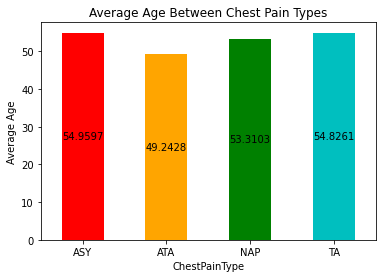

In [22]:
plt.title("Average Age Between Chest Pain Types")
plt.ylabel("Average Age")

ax = group.plot(kind='bar', color=['r','orange','g','c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Age Between Fasting Blood Sugar Levels

In [23]:
group = heart_data.groupby("FastingBS")["Age"].mean()
group

FastingBS
=<120 mg/dl    52.481534
>120 mg/dl     56.897196
Name: Age, dtype: float64

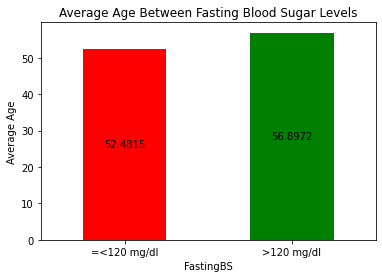

In [24]:
plt.title("Average Age Between Fasting Blood Sugar Levels")
plt.ylabel("Average Age")

ax = group.plot(kind='bar', color=['r','g'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Age Between Resting ECG Types

In [25]:
group = heart_data.groupby("RestingECG")["Age"].mean()
group

RestingECG
LVH       56.218085
Normal    51.740942
ST        56.140449
Name: Age, dtype: float64

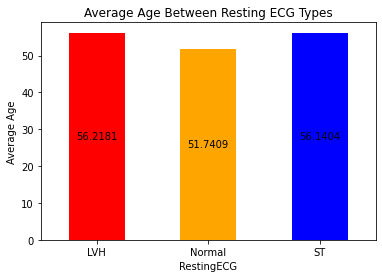

In [26]:
plt.title("Average Age Between Resting ECG Types")
plt.ylabel("Average Age")

ax = group.plot(kind='bar', color=['red','orange','b'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Age With/Without Exercise Angina

In [27]:
group = heart_data.groupby("ExerciseAngina")["Age"].mean()
group

ExerciseAngina
N    51.835466
Y    55.981132
Name: Age, dtype: float64

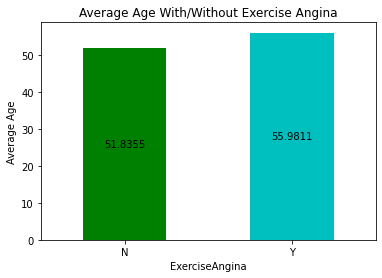

In [28]:
plt.title("Average Age With/Without Exercise Angina")
plt.ylabel("Average Age")

ax = group.plot(kind='bar', color=['g','c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Age Between ST Slope Types

In [29]:
group = heart_data.groupby("ST_Slope")["Age"].mean()
group

ST_Slope
Down    58.317460
Flat    55.256522
Up      50.711392
Name: Age, dtype: float64

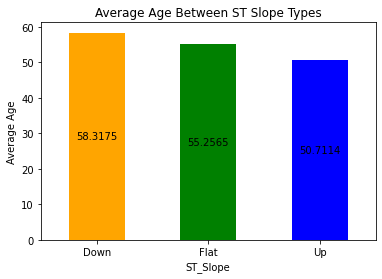

In [30]:
plt.title("Average Age Between ST Slope Types")
plt.ylabel("Average Age")

ax = group.plot(kind='bar', color=['orange','g', 'b'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average RestingBP Between Normal and Heart Disease Patients

In [31]:
group = heart_data.groupby("HeartDisease")["RestingBP"].mean()
group

HeartDisease
HD      134.185039
Norm    130.180488
Name: RestingBP, dtype: float64

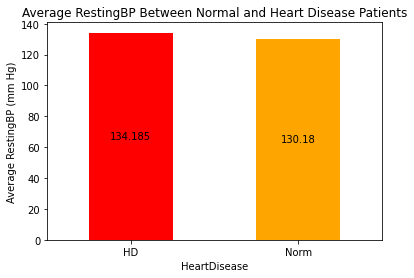

In [32]:
plt.title("Average RestingBP Between Normal and Heart Disease Patients")
plt.ylabel("Average RestingBP (mm Hg)")

ax = group.plot(kind='bar', color=['r', 'orange'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average RestingBP Between Males and Females

In [33]:
group = heart_data.groupby("Sex")["RestingBP"].mean()
group 

Sex
F    132.212435
M    132.445517
Name: RestingBP, dtype: float64

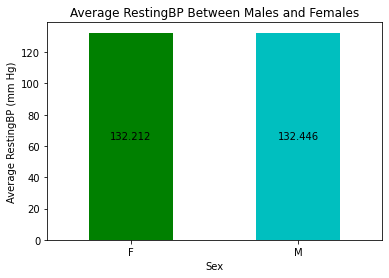

In [34]:
plt.title("Average RestingBP Between Males and Females")
plt.ylabel("Average RestingBP (mm Hg)")

ax = group.plot(kind='bar', color=['g', 'c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average RestingBP Between Combination of Male/Female and Normal/Heart Disease Patients

In [35]:
group = heart_data.groupby(["HeartDisease", "Sex"])["RestingBP"].mean()
group

HeartDisease  Sex
HD            F      142.000000
              M      133.331878
Norm          F      128.790210
              M      130.925094
Name: RestingBP, dtype: float64

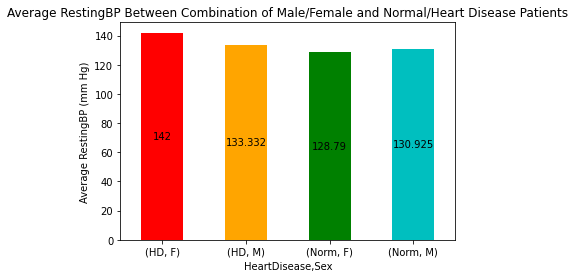

In [36]:
plt.title("Average RestingBP Between Combination of Male/Female and Normal/Heart Disease Patients")
plt.ylabel("Average RestingBP (mm Hg)")

ax = group.plot(kind='bar', color=['r','orange','g','c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Cholesterol Between Normal and Heart Disease Patients

In [37]:
group = heart_data.groupby("HeartDisease")["Cholesterol"].mean()
group

HeartDisease
HD      175.940945
Norm    227.121951
Name: Cholesterol, dtype: float64

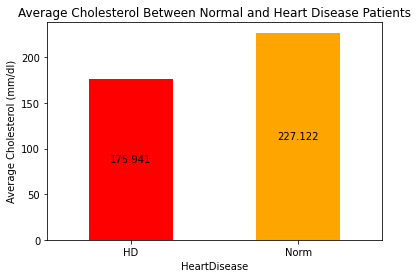

In [38]:
plt.title("Average Cholesterol Between Normal and Heart Disease Patients")
plt.ylabel("Average Cholesterol (mm/dl)")

ax = group.plot(kind='bar', color=['r', 'orange'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Cholesterol Between Males and Females

In [39]:
group = heart_data.groupby("Sex")["Cholesterol"].mean()
group

Sex
F    241.196891
M    187.513103
Name: Cholesterol, dtype: float64

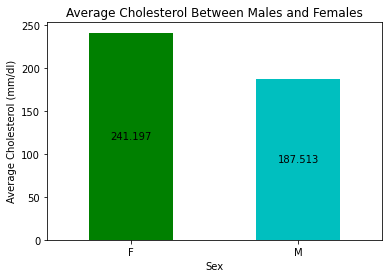

In [40]:
plt.title("Average Cholesterol Between Males and Females")
plt.ylabel("Average Cholesterol (mm/dl)")

ax = group.plot(kind='bar', color=['g', 'c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Cholesterol Between Combination of Male/Female and Normal/Heart Disease Patients

In [41]:
group = heart_data.groupby(["HeartDisease", "Sex"])["Cholesterol"].mean()
group

HeartDisease  Sex
HD            F      223.340000
              M      170.766376
Norm          F      247.440559
              M      216.239700
Name: Cholesterol, dtype: float64

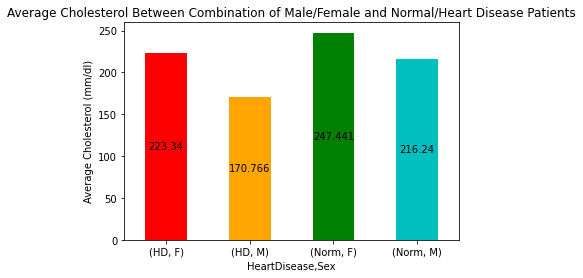

In [42]:
plt.title("Average Cholesterol Between Combination of Male/Female and Normal/Heart Disease Patients")
plt.ylabel("Average Cholesterol (mm/dl)")

ax = group.plot(kind='bar', color=['r', 'orange', 'g', 'c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average MaxHR Between Normal and Heart Disease Patients

In [43]:
group = heart_data.groupby("HeartDisease")["MaxHR"].mean()
group

HeartDisease
HD      127.655512
Norm    148.151220
Name: MaxHR, dtype: float64

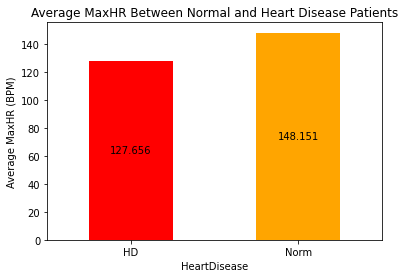

In [44]:
plt.title("Average MaxHR Between Normal and Heart Disease Patients")
plt.ylabel("Average MaxHR (BPM)")

ax = group.plot(kind='bar', color=['r', 'orange'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average MaxHR Between Males and Females

In [45]:
group = heart_data.groupby("Sex")["MaxHR"].mean()
group

Sex
F    146.139896
M    134.325517
Name: MaxHR, dtype: float64

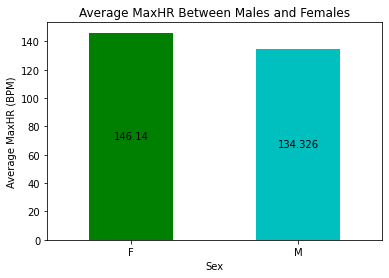

In [46]:
plt.title("Average MaxHR Between Males and Females")
plt.ylabel("Average MaxHR (BPM)")

ax = group.plot(kind='bar', color=['g', 'c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average MaxHR Between Combination of Male/Female and Normal/Heart Disease Patients

In [47]:
group = heart_data.groupby(["HeartDisease", "Sex"])["MaxHR"].mean()
group

HeartDisease  Sex
HD            F      137.820000
              M      126.545852
Norm          F      149.048951
              M      147.670412
Name: MaxHR, dtype: float64

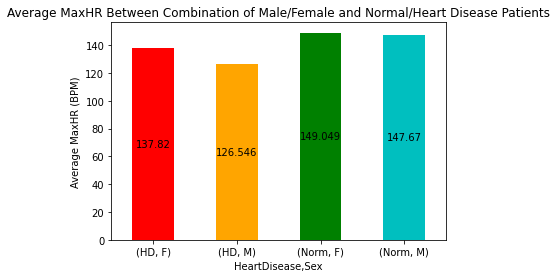

In [48]:
plt.title("Average MaxHR Between Combination of Male/Female and Normal/Heart Disease Patients")
plt.ylabel("Average MaxHR (BPM)")

ax = group.plot(kind='bar', color=['r', 'orange', 'g', 'c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Oldpeak Between Normal and Heart Disease Patients

In [49]:
group = heart_data.groupby("HeartDisease")["Oldpeak"].mean()
group

HeartDisease
HD      1.274213
Norm    0.408049
Name: Oldpeak, dtype: float64

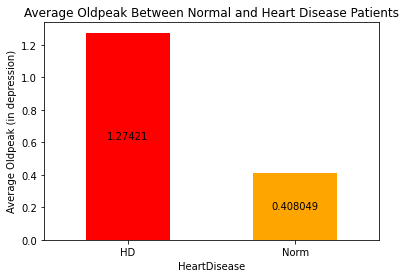

In [50]:
plt.title("Average Oldpeak Between Normal and Heart Disease Patients")
plt.ylabel("Average Oldpeak (in depression)")

ax = group.plot(kind='bar', color=['r', 'orange'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Oldpeak Between Males and Females

In [51]:
group = heart_data.groupby("Sex")["Oldpeak"].mean()
group

Sex
F    0.668912
M    0.945517
Name: Oldpeak, dtype: float64

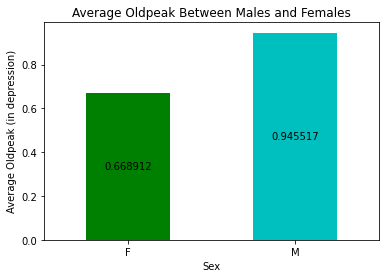

In [52]:
plt.title("Average Oldpeak Between Males and Females")
plt.ylabel("Average Oldpeak (in depression)")

ax = group.plot(kind='bar', color=['g', 'c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Average Oldpeak Between Combination of Male/Female and Normal/Heart Disease Patients

In [53]:
group = heart_data.groupby(["HeartDisease", "Sex"])["Oldpeak"].mean()
group

HeartDisease  Sex
HD            F      1.336000
              M      1.267467
Norm          F      0.435664
              M      0.393258
Name: Oldpeak, dtype: float64

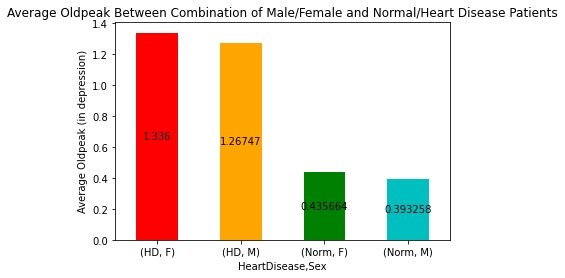

In [54]:
plt.title("Average Oldpeak Between Combination of Male/Female and Normal/Heart Disease Patients")
plt.ylabel("Average Oldpeak (in depression)")

ax = group.plot(kind='bar', color=['r', 'orange', 'g', 'c'], stacked=False, rot=0)

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Male/Female Patients that have Heart Disease/Normal Condition

In [55]:
ct = pd.crosstab(heart_data.Sex, heart_data.HeartDisease, normalize='index')
ct

HeartDisease,HD,Norm
Sex,,
F,0.259067,0.740933
M,0.631724,0.368276


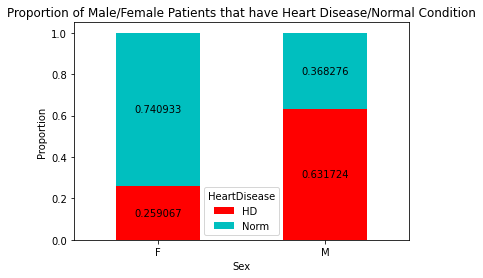

In [56]:
ax = ct.plot(kind='bar', color=['r', 'c'], stacked=True, rot=0)

plt.title("Proportion of Male/Female Patients that have Heart Disease/Normal Condition")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Heart Disease/Normal Patients that are Male/Female

In [57]:
ct = pd.crosstab(heart_data.HeartDisease, heart_data.Sex, normalize='index')
ct

Sex,F,M
HeartDisease,,
HD,0.098425,0.901575
Norm,0.348780,0.651220


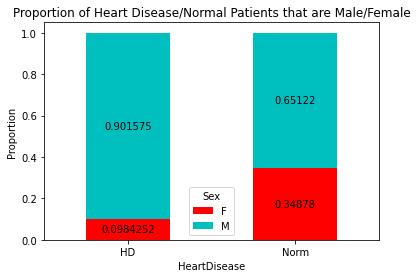

In [58]:
ax = ct.plot(kind='bar', color=['r', 'c'], stacked=True, rot=0)

plt.title("Proportion of Heart Disease/Normal Patients that are Male/Female")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Patients with Chest Pain Types that have Heart Disease/Normal Condition

In [59]:
ct = pd.crosstab(heart_data.ChestPainType, heart_data.HeartDisease, normalize='index')
ct

HeartDisease,HD,Norm
ChestPainType,,
ASY,0.790323,0.209677
ATA,0.138728,0.861272
NAP,0.354680,0.645320
TA,0.434783,0.565217


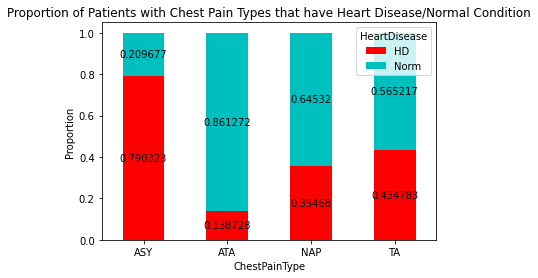

In [60]:
ax = ct.plot(kind='bar', color=['r', 'c'], stacked=True, rot=0)

plt.title("Proportion of Patients with Chest Pain Types that have Heart Disease/Normal Condition")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Males and Females with Chest Pain Types

In [61]:
ct = pd.crosstab(heart_data.Sex, heart_data.ChestPainType, normalize='index')
ct

ChestPainType,ASY,ATA,NAP,TA
Sex,,,,
F,0.362694,0.310881,0.274611,0.051813
M,0.587586,0.155862,0.206897,0.049655


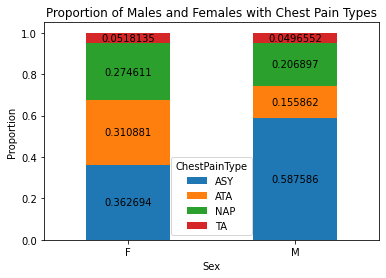

In [62]:
ax = ct.plot(kind='bar', stacked=True, rot=0)

plt.title("Proportion of Males and Females with Chest Pain Types")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Patients with/without Exercise Angina that have Heart Disease/Normal Condition

In [63]:
ct = pd.crosstab(heart_data.ExerciseAngina, heart_data.HeartDisease, normalize='index')
ct

HeartDisease,HD,Norm
ExerciseAngina,,
N,0.351005,0.648995
Y,0.851752,0.148248


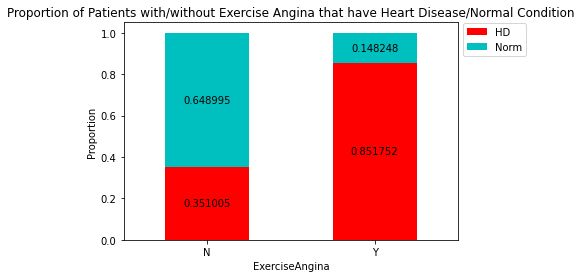

In [64]:
ax = ct.plot(kind='bar', color=['r', 'c'], stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of Patients with/without Exercise Angina that have Heart Disease/Normal Condition")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Males and Females with/without Exercise Angina

In [65]:
ct = pd.crosstab(heart_data.Sex, heart_data.ExerciseAngina, normalize='index')
ct

ExerciseAngina,N,Y
Sex,,
F,0.777202,0.222798
M,0.547586,0.452414


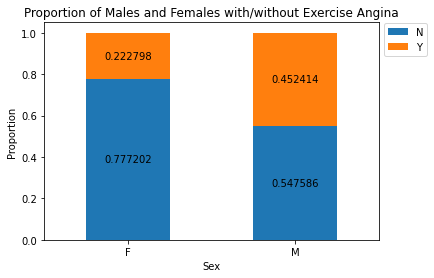

In [66]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of Males and Females with/without Exercise Angina")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Patients with Resting ECG Types that have Heart Disease/Normal Condition

In [67]:
ct = pd.crosstab(heart_data.RestingECG, heart_data.HeartDisease, normalize='index')
ct

HeartDisease,HD,Norm
RestingECG,,
LVH,0.563830,0.436170
Normal,0.516304,0.483696
ST,0.657303,0.342697


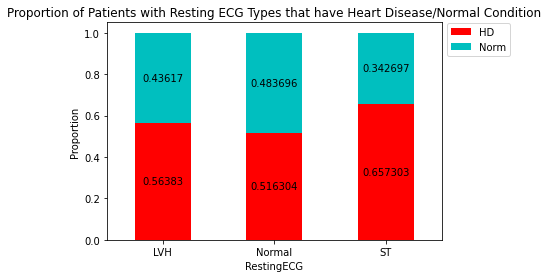

In [68]:
ax = ct.plot(kind='bar', color=['r', 'c'], stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of Patients with Resting ECG Types that have Heart Disease/Normal Condition")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Males and Females with Resting ECG Types

In [69]:
ct = pd.crosstab(heart_data.Sex, heart_data.RestingECG, normalize='index')
ct

RestingECG,LVH,Normal,ST
Sex,,,
F,0.243523,0.611399,0.145078
M,0.194483,0.598621,0.206897


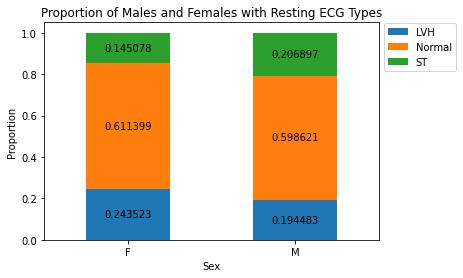

In [70]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of Males and Females with Resting ECG Types")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Patients with Fasting BS Types that have Heart Disease/Normal Condition

In [71]:
ct = pd.crosstab(heart_data.FastingBS, heart_data.HeartDisease, normalize='index')
ct

HeartDisease,HD,Norm
FastingBS,,
=<120 mg/dl,0.480114,0.519886
>120 mg/dl,0.794393,0.205607


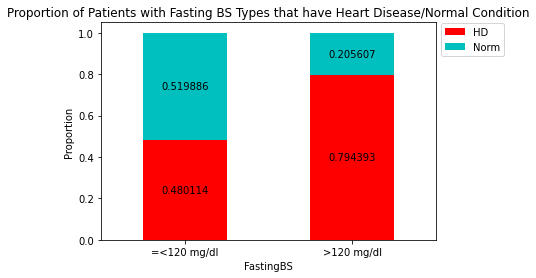

In [72]:
ax = ct.plot(kind='bar', color=['r', 'c'], stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of Patients with Fasting BS Types that have Heart Disease/Normal Condition")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Males and Females with Fasting BS Types

In [73]:
ct = pd.crosstab(heart_data.Sex, heart_data.FastingBS, normalize='index')
ct

FastingBS,=<120 mg/dl,>120 mg/dl
Sex,,
F,0.865285,0.134715
M,0.740690,0.259310


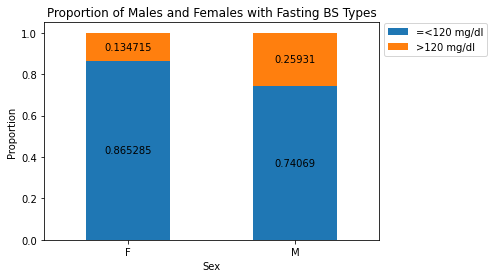

In [74]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of Males and Females with Fasting BS Types")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Patients with ST Slope Types that have Heart Disease/Normal Condition

In [75]:
ct = pd.crosstab(heart_data.ST_Slope, heart_data.HeartDisease, normalize='index')
ct

HeartDisease,HD,Norm
ST_Slope,,
Down,0.777778,0.222222
Flat,0.828261,0.171739
Up,0.197468,0.802532


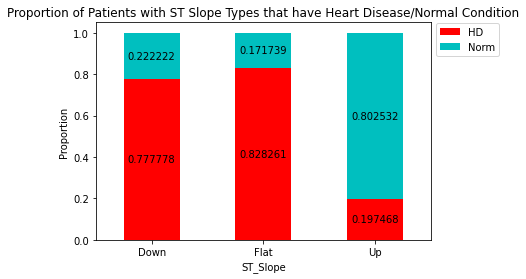

In [76]:
ax = ct.plot(kind='bar', color=['r', 'c'], stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of Patients with ST Slope Types that have Heart Disease/Normal Condition")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Proportion of Males and Females with ST Slope Types

In [77]:
ct = pd.crosstab(heart_data.Sex, heart_data.ST_Slope, normalize='index')
ct

ST_Slope,Down,Flat,Up
Sex,,,
F,0.036269,0.388601,0.575130
M,0.077241,0.531034,0.391724


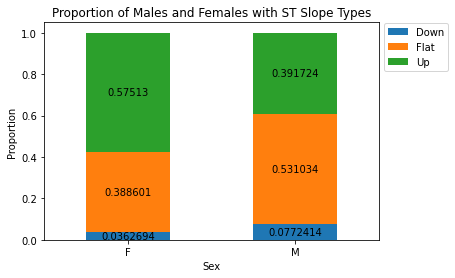

In [78]:
ax = ct.plot(kind='bar', stacked=True, rot=0)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title("Proportion of Males and Females with ST Slope Types")
plt.ylabel("Proportion")

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

Predicting Whether Patient Has Heart Disease Based on Different Health/Demographic Factors

In [79]:
# Inspecting first 5 rows of Heart dataframe
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,=<120 mg/dl,Normal,172,N,0.0,Up,Norm
1,49,F,NAP,160,180,=<120 mg/dl,Normal,156,N,1.0,Flat,HD
2,37,M,ATA,130,283,=<120 mg/dl,ST,98,N,0.0,Up,Norm
3,48,F,ASY,138,214,=<120 mg/dl,Normal,108,Y,1.5,Flat,HD
4,54,M,NAP,150,195,=<120 mg/dl,Normal,122,N,0.0,Up,Norm


In [81]:
# Inspecting first 5 rows of Heart dataframe copy version (ALL numerical values in string data type format for Categorical Variables)
heart_data_copy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,2,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,2,130,283,0,1,98,0,0.0,2,0
3,48,0,0,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,2,0


In [ ]:
#@title
# # calculate summary statistics
# data_mean, data_std = mean(health_data), std(health_data)

# # identify outliers
# cut_off = data_std * 3
# lower, upper = data_mean - cut_off, data_mean + cut_off

# # identify outliers
# outliers = [x for x in data if x < lower or x > upper]

# # remove outliers
# outliers_removed = [x for x in data if x > lower and x < upper]

In [82]:
# Checking to see outliers in dataframe
cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'] # one or more columns
Q1 = heart_data_copy[cols].quantile(0.25)
Q3 = heart_data_copy[cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((heart_data_copy < (Q1 - 1.5 * IQR)) | (heart_data_copy > (Q3 + 1.5 * IQR))).any(axis=1)
outliers.value_counts()

False    702
True     216
dtype: int64

In [83]:
# Removing Outliers in heart dataframe
# heart_data_copy = heart_data_copy[~((heart_data_copy < (Q1 - 1.5 * IQR)) |(heart_data_copy > (Q3 + 1.5 * IQR))).any(axis=1)]

# heart_data_copy.shape

In [195]:
# Features and target variable
X = heart_data_copy.drop(["HeartDisease"], axis=1)
y = heart_data_copy["HeartDisease"]

In [196]:
# Inspection of first 5 rows of features (X) dataframe
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,2,140,289,0,0,172,0,0.0,2
1,49,0,1,160,180,0,0,156,0,1.0,1
2,37,1,2,130,283,0,1,98,0,0.0,2
3,48,0,0,138,214,0,0,108,1,1.5,1
4,54,1,1,150,195,0,0,122,0,0.0,2


In [197]:
# Features dataframe (X) columns
X.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [198]:
# Select K Best Features Using Univariate Selection (Chi-Squared Test Only For Categorical Features with Categorical Target)
best_features = SelectKBest(score_func = chi2, k = 6)
X_copy = X[['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] # categorical features only 
fit_best_features = best_features.fit(X_copy, y)

# Get scores for each categorical feature in relation to categorical target (Heart Disease) in one dataframe
scores_df_categorical = pd.DataFrame(fit_best_features.scores_)
features_df_categorical = pd.DataFrame(X_copy.columns)
feature_scores_categorical = pd.concat([features_df_categorical, scores_df_categorical], axis = 1)
feature_scores_categorical.columns = ['Feature', 'Score']
feature_scores_categorical.nlargest(6, 'Score')

,Feature,Score
1,ChestPainType,235.981931
4,ExerciseAngina,133.640134
5,ST_Slope,77.486680
2,FastingBS,50.296983
0,Sex,18.006243
3,RestingECG,3.674137


In [199]:
# Select K Best Features Using Univariate Selection (ANOVA F-Test Only For Regression Features with Categorical Target)
best_features = SelectKBest(score_func = f_classif, k = 5)
X_copy = X[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] # regression features only 
fit_best_features = best_features.fit(X_copy, y)

# Get scores for each regression feature in relation to categorical target (Heart Disease) in one dataframe
scores_df_regression = pd.DataFrame(fit_best_features.scores_)
features_df_regression = pd.DataFrame(X_copy.columns)
feature_scores_regression = pd.concat([features_df_regression, scores_df_regression], axis = 1)
feature_scores_regression.columns = ['Feature', 'Score']
feature_scores_regression.nlargest(5, 'Score')

,Feature,Score
4,Oldpeak,178.615120
3,MaxHR,174.913585
0,Age,79.160779
2,Cholesterol,52.459725
1,RestingBP,10.727228


In [200]:
# Concat scores for Regression and Categorical Features Together and Sort them by Score
feature_scores = pd.concat([feature_scores_categorical, feature_scores_regression], axis = 0)
feature_scores.nlargest(11, 'Score')

,Feature,Score
1,ChestPainType,235.981931
4,Oldpeak,178.615120
3,MaxHR,174.913585
4,ExerciseAngina,133.640134
0,Age,79.160779
5,ST_Slope,77.486680
2,Cholesterol,52.459725
2,FastingBS,50.296983
0,Sex,18.006243
1,RestingBP,10.727228


[0.07377891 0.04743227 0.13632313 0.07003345 0.09695016 0.04520508
 0.03609371 0.08714765 0.13942602 0.07896621 0.18864342]


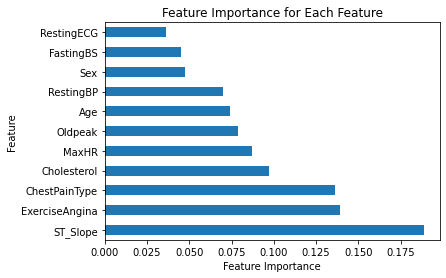

In [201]:
# Feature Importance Using Extra Trees Decision Classifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

# Plotting graph of feature importance for each feature
feature_importance = pd.Series(model.feature_importances_, index = X.columns)
feature_importance.nlargest(11).plot(kind = 'barh')
plt.title('Feature Importance for Each Feature')
plt.ylabel('Feature')
plt.xlabel('Feature Importance')
plt.show()

In [202]:
# Let's choose top 8 features here for Machine Learning modelling BASED on scores instead of feature importance
# chosen_features = list(feature_scores.nlargest(11, 'Score')['Feature'].iloc[0:8])
# X = X[chosen_features]

# Or let's choose features that are relatively high feature importance and/or scores (Judgement Call!)
chosen_features = ['ChestPainType', 'Oldpeak', 'MaxHR', 'ExerciseAngina', 'ST_Slope', 'Cholesterol', 'FastingBS', 'Age']
X = X[chosen_features]
X.head()

,ChestPainType,Oldpeak,MaxHR,ExerciseAngina,ST_Slope,Cholesterol,FastingBS,Age
0,2,0.0,172,0,2,289,0,40
1,1,1.0,156,0,1,180,0,49
2,2,0.0,98,0,2,283,0,37
3,0,1.5,108,1,1,214,0,48
4,1,0.0,122,0,2,195,0,54


In [203]:
# Dummy encoding for Categorical Variables in Features Dataframe (X)
X = pd.get_dummies(data = X)

In [204]:
# Features Dataframe (X) After Dummy Encoding
X.head()

,Oldpeak,MaxHR,Cholesterol,Age,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,FastingBS_0,FastingBS_1
0,0.0,172,289,40,0,0,1,0,1,0,0,0,1,1,0
1,1.0,156,180,49,0,1,0,0,1,0,0,1,0,1,0
2,0.0,98,283,37,0,0,1,0,1,0,0,0,1,1,0
3,1.5,108,214,48,1,0,0,0,0,1,0,1,0,1,0
4,0.0,122,195,54,0,1,0,0,1,0,0,0,1,1,0


In [205]:
# Inspection of first 5 rows of target (y) dataframe
pd.DataFrame(y).head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [206]:
# Splitting DataFrame into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [207]:
# Scaling Training and Testing Dataset (X_train and X_test) to Standardize/Normalize
from sklearn.preprocessing import StandardScaler

def scaling(X_train, X_test):
  scaler = StandardScaler()

  X_train_scale = scaler.fit_transform(X_train)
  X_test_scale = scaler.transform(X_test)

  X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
  X_test_scale = pd.DataFrame(X_test_scale, columns = X_test.columns)

  return X_train_scale, X_test_scale

In [208]:
# Scaling Training Dataset (X_train and X_test) to Standardize/Normalize
X_train, X_test = scaling(X_train, X_test)

In [209]:
# Inspection of first 5 rows of X_train dataframe
X_train.head()

,Oldpeak,MaxHR,Cholesterol,Age,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,FastingBS_0,FastingBS_1
0,-0.729460,0.774609,0.294989,0.464714,0.901975,-0.520852,-0.489267,-0.209529,0.830346,-0.830346,-0.254316,-1.025241,1.158907,0.525682,-0.525682
1,0.990283,-1.173673,-1.905390,0.781767,0.901975,-0.520852,-0.489267,-0.209529,-1.204318,1.204318,3.932116,-1.025241,-0.862882,-1.902289,1.902289
2,-0.819972,-0.605424,-1.905390,-0.063707,-1.108678,1.919930,-0.489267,-0.209529,-1.204318,1.204318,-0.254316,0.975381,-0.862882,-1.902289,1.902289
3,0.085155,-1.295440,0.257376,0.993136,0.901975,-0.520852,-0.489267,-0.209529,-1.204318,1.204318,-0.254316,0.975381,-0.862882,-1.902289,1.902289
4,0.809258,-0.199532,1.197709,0.993136,0.901975,-0.520852,-0.489267,-0.209529,-1.204318,1.204318,-0.254316,-1.025241,1.158907,-1.902289,1.902289


In [210]:
# Variance between columns in X_train Dataframe
X_train.var(ddof=0)

Oldpeak             1.0
MaxHR               1.0
Cholesterol         1.0
Age                 1.0
ChestPainType_0     1.0
ChestPainType_1     1.0
ChestPainType_2     1.0
ChestPainType_3     1.0
ExerciseAngina_0    1.0
ExerciseAngina_1    1.0
ST_Slope_0          1.0
ST_Slope_1          1.0
ST_Slope_2          1.0
FastingBS_0         1.0
FastingBS_1         1.0
dtype: float64

In [211]:
# Inspection of first 5 rows of X_test dataframe
X_test.head()

,Oldpeak,MaxHR,Cholesterol,Age,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,FastingBS_0,FastingBS_1
0,-0.819972,1.708160,-0.071741,0.993136,-1.108678,-0.520852,2.043874,-0.209529,0.830346,-0.830346,-0.254316,-1.025241,1.158907,0.525682,-0.525682
1,-0.819972,-0.280710,2.965535,-0.063707,-1.108678,1.919930,-0.489267,-0.209529,0.830346,-0.830346,-0.254316,0.975381,-0.862882,0.525682,-0.525682
2,0.266181,-0.605424,-1.905390,1.204504,0.901975,-0.520852,-0.489267,-0.209529,0.830346,-0.830346,-0.254316,0.975381,-0.862882,-1.902289,1.902289
3,0.085155,-0.605424,-1.905390,0.253346,0.901975,-0.520852,-0.489267,-0.209529,-1.204318,1.204318,-0.254316,0.975381,-0.862882,0.525682,-0.525682
4,-0.819972,0.774609,1.000239,0.041977,-1.108678,-0.520852,2.043874,-0.209529,0.830346,-0.830346,-0.254316,-1.025241,1.158907,0.525682,-0.525682


In [212]:
# Variance between columns in X_test Dataframe
X_test.var(ddof=0)

Oldpeak             0.768144
MaxHR               1.221978
Cholesterol         1.178936
Age                 0.974939
ChestPainType_0     1.009832
ChestPainType_1     1.083935
ChestPainType_2     0.936963
ChestPainType_3     1.591108
ExerciseAngina_0    0.989259
ExerciseAngina_1    0.989259
ST_Slope_0          1.391495
ST_Slope_1          0.998047
ST_Slope_2          1.006400
FastingBS_0         1.166612
FastingBS_1         1.166612
dtype: float64

In [213]:
# Modelling on Revised Training and Testing Dataset  (X_train_scale and y_train_scale)
# Predicting on test set (X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report

def train_predict_model(model_name, X_train, X_test, y_train):
    model = model_name
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred
    
def model_accuracy(model_name, X_train, X_test, y_train, y_test):
    y_pred = train_predict_model(model_name, X_train, X_test, y_train)

    # Use score method to get accuracy of model
    score = accuracy_score(y_test, y_pred)
    return score

def confusion_matrix(model_name, X_train, X_test, y_train, y_test):
    y_pred = train_predict_model(model_name, X_train, X_test, y_train)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score = model_accuracy(model_name, X_train, X_test, y_train, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    return plt.title(all_sample_title, size = 15)

def class_report(model_name, X_train, X_test, y_train, y_test):
  y_pred = train_predict_model(model_name, X_train, X_test, y_train)
  print(classification_report(y_test, y_pred))

                    
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.92      0.87      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



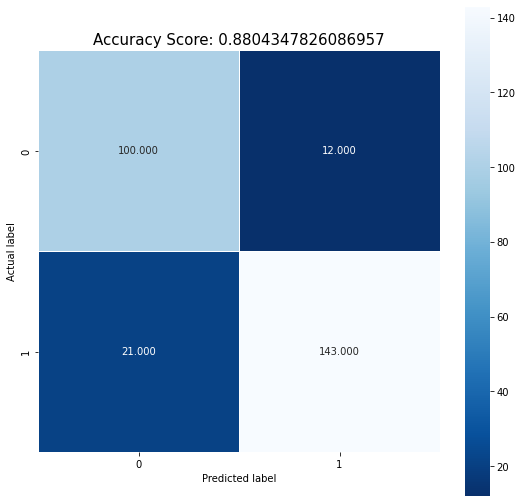

In [214]:
# Confusion Matrix of Accuracy of Logistic Regression
log_model = LogisticRegression()
confusion_matrix(log_model, X_train, X_test, y_train, y_test)
print("                    ")

# Classification Report Using Logistic Regression
class_report(log_model, X_train, X_test, y_train, y_test)

                  
              precision    recall  f1-score   support

           0       0.66      0.83      0.74       112
           1       0.86      0.71      0.78       164

    accuracy                           0.76       276
   macro avg       0.76      0.77      0.76       276
weighted avg       0.78      0.76      0.76       276



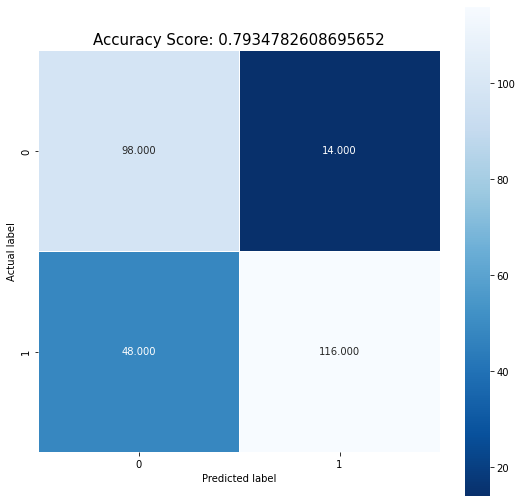

In [215]:
# Confusion Matrix of Accuracy of Decision Tree Classifier
DTC_model = DecisionTreeClassifier()
confusion_matrix(DTC_model, X_train, X_test, y_train, y_test)
print("                  ")

# Classification Report Using Decision Tree Classifier
class_report(DTC_model, X_train, X_test, y_train, y_test)

         
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       112
           1       0.91      0.90      0.90       164

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276



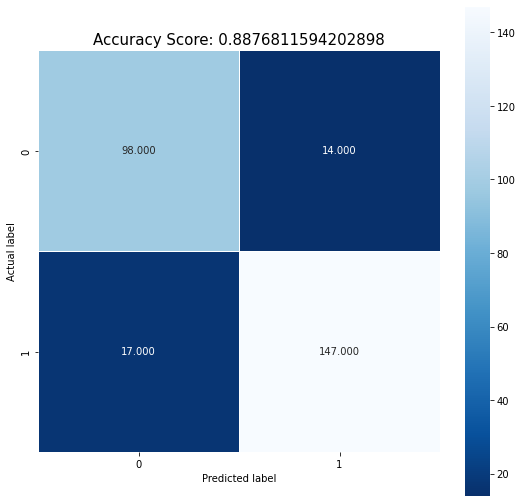

In [216]:
# Confusion Matrix of Accuracy of Support Vector Classifier
SVC_model = svm.SVC()
confusion_matrix(SVC_model, X_train, X_test, y_train, y_test)
print("         ")

# Classification Report Using Support Vector Classifier
class_report(SVC_model, X_train, X_test, y_train, y_test)

k value with minimum error:  (14, 0.10869565217391304)


Text(0, 0.5, 'Mean Error')

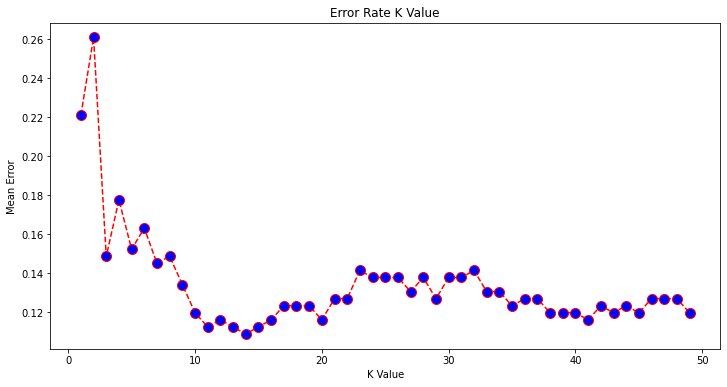

In [217]:
# Best number of k clusters value for k-Nearest Neighbours Based on error rate
error = []
k_with_error = []

# Picking optimal  k value after calculating error for k values between 1 and 50
for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    pred_i = train_predict_model(knn_model, X_train, X_test, y_train)
    error.append(np.mean(pred_i != y_test))
    k_with_error.append((i, np.mean(pred_i != y_test)))

print("k value with minimum error: ", min(k_with_error, key=lambda x: x[1]))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

k value with maximum score:  (14, 0.8913043478260869)


Text(0, 0.5, 'Accuracy Score')

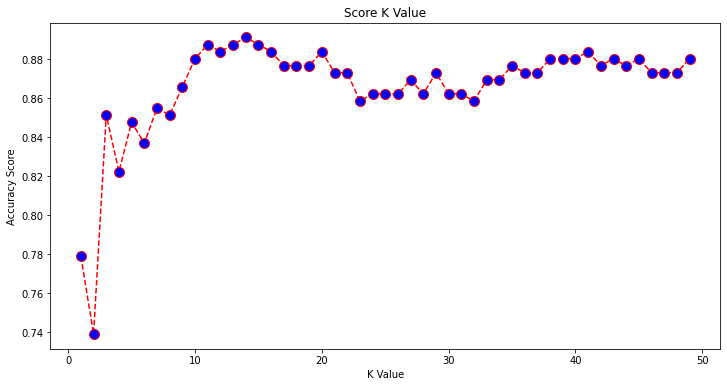

In [218]:
# Best number of k clusters value for k-Nearest Neighbours Based on score
k_values_with_scores = []
scores = []

for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    score = model_accuracy(knn_model, X_train, X_test, y_train, y_test)
    scores.append(score)
    k_values_with_scores.append((i, score))
    
print("k value with maximum score: ", max(k_values_with_scores, key=lambda x: x[1]))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

          
              precision    recall  f1-score   support

           0       0.83      0.93      0.87       112
           1       0.95      0.87      0.90       164

    accuracy                           0.89       276
   macro avg       0.89      0.90      0.89       276
weighted avg       0.90      0.89      0.89       276



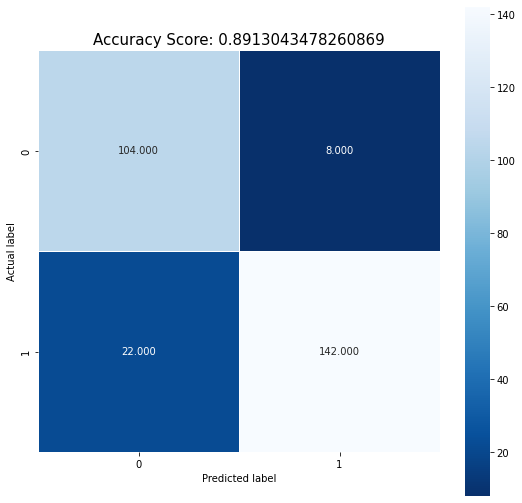

In [219]:
# Confusion Matrix of Accuracy of K-Nearest Neighbours Classifier
knn_model = KNeighborsClassifier(n_neighbors=14)
confusion_matrix(knn_model, X_train, X_test, y_train, y_test)
print("          ")

# Classification Report Using K-Nearest-Neighbours Classifier
class_report(knn_model, X_train, X_test, y_train, y_test)

          
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       112
           1       0.92      0.87      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



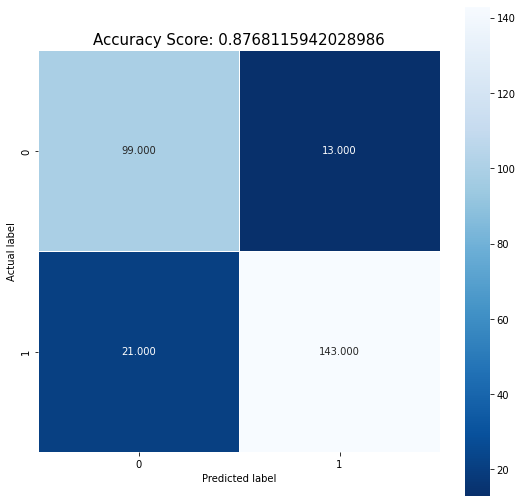

In [220]:
# Confusion Matrix of Accuracy of Gaussian Naive Bayes Classifier
nb_model = GaussianNB()
confusion_matrix(nb_model, X_train, X_test, y_train, y_test)
print("          ")

# Classification Report Using Gaussian Naive Bayes Classifier
class_report(nb_model, X_train, X_test, y_train, y_test)

n_estimators value with minimum error:  (62, 0.11231884057971014)


Text(0, 0.5, 'Mean Error')

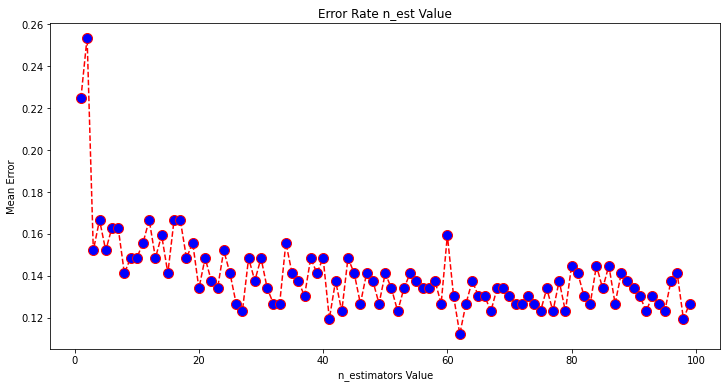

In [221]:
# Best number of trees value for Random Forest Classifier Based on error rate
error = []
n_est_with_error = []

# Picking optimal  k value after calculating error for k values between 1 and 40
for i in range(1, 100):
    rfc_model=RandomForestClassifier(n_estimators=i)
    pred_i = train_predict_model(rfc_model, X_train, X_test, y_train)
    error.append(np.mean(pred_i != y_test))
    n_est_with_error.append((i, np.mean(pred_i != y_test)))

print("n_estimators value with minimum error: ", min(n_est_with_error, key=lambda x: x[1]))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate n_est Value')
plt.xlabel('n_estimators Value')
plt.ylabel('Mean Error')

n_estimators value with maximum score:  (46, 0.8768115942028986)


Text(0, 0.5, 'Accuracy Score')

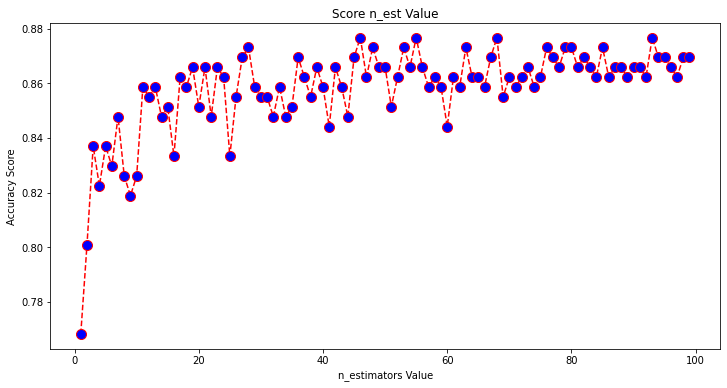

In [190]:
# Best number of trees value for Random Forest Classifier Based on score

n_est_values_with_scores = []
scores = []

for i in range(1, 100):
    rfc_model=RandomForestClassifier(n_estimators=i)
    score = model_accuracy(rfc_model, X_train, X_test, y_train, y_test)
    scores.append(score)
    n_est_values_with_scores.append((i, score))
    
print("n_estimators value with maximum score: ", max(n_est_values_with_scores, key=lambda x: x[1]))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score n_est Value')
plt.xlabel('n_estimators Value')
plt.ylabel('Accuracy Score')

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.91      0.87      0.89       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



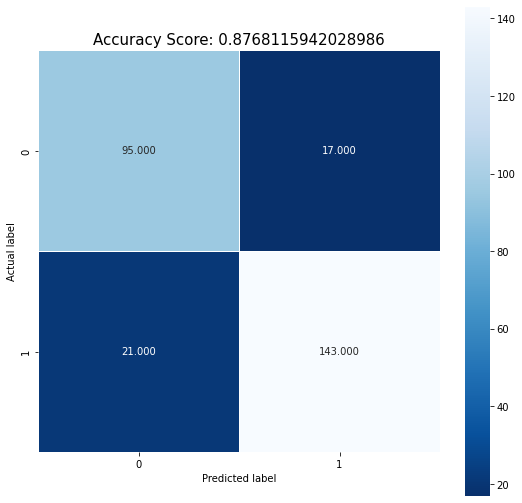

In [225]:
# Confusion Matrix of Accuracy of Random Forest Classifier 
rfc_model = RandomForestClassifier(n_estimators=46)
confusion_matrix(rfc_model, X_train, X_test, y_train, y_test)

# Classification Report Using Gaussian Random Forest Classifier
class_report(rfc_model, X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.91      0.88      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276



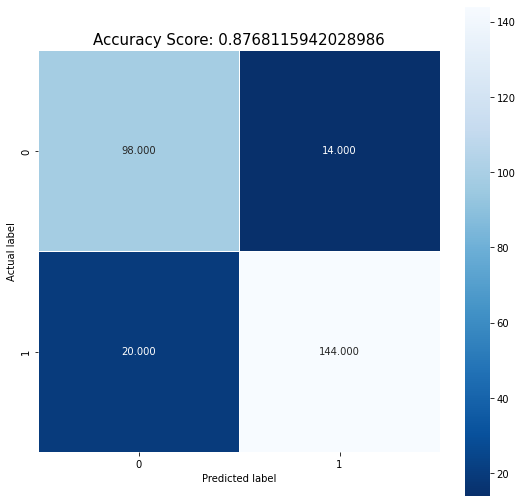

In [226]:
# Confusion Matrix of Accuracy of xgBoost Classifier
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic')
confusion_matrix(xgb_model, X_train, X_test, y_train, y_test)

# Classification Report Using Gaussian Random Forest Classifier
class_report(xgb_model, X_train, X_test, y_train, y_test)